<a href="https://colab.research.google.com/github/sizday/NeuralNetworksCource/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1


1) Берем датасет, модель и обучаем с 0 (рандомная инициализация весов)

2) Берем датасет, модель и обучаем с претрейна ImageNet

3) Берем претрейн ImageNet и строим классификатор второго уровня на его фичах

## Data

In [ ]:
import pandas as pd
import os
from random import seed
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn import utils
import matplotlib.pyplot as plt
from sklearn import svm
import torch
from tensorflow import keras
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!cp /gdrive/MyDrive/small.zip .
!unzip small.zip -d small_zip

In [ ]:
DATA_PATH_TRAIN = f"/content/small_zip/small/train"
DATA_PATH_VALID = f"/content/small_zip/small/validation"

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
  DATA_PATH_TRAIN,
  validation_split=0.2,
  subset="training",
  seed=1001,
  image_size=(224, 224))

Found 512 files belonging to 2 classes.
Using 410 files for training.


In [ ]:
valid_ds = keras.utils.image_dataset_from_directory(
  DATA_PATH_VALID,
  validation_split=0.2,
  subset="validation",
  seed=1001,
  image_size=(224, 224))

Found 256 files belonging to 2 classes.
Using 51 files for validation.


## Pretrained model

In [ ]:
model = keras.applications.resnet50.ResNet50(
    weights=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,
)

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
def draw_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def draw_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 136s 10s/step - loss: 2.7116 - accuracy: 0.4829 - val_loss: 3.9847 - val_accuracy: 0.5686
Epoch 2/10
13/13 [==============================] - 118s 9s/step - loss: 0.9257 - accuracy: 0.5512 - val_loss: 65.0468 - val_accuracy: 0.5686
Epoch 3/10
13/13 [==============================] - 112s 9s/step - loss: 0.8800 - accuracy: 0.6976 - val_loss: 8.3995 - val_accuracy: 0.5294
Epoch 4/10
13/13 [==============================] - 119s 9s/step - loss: 0.5800 - accuracy: 0.7780 - val_loss: 10.8359 - val_accuracy: 0.5686
Epoch 5/10
13/13 [==============================] - 115s 9s/step - loss: 0.4065 - accuracy: 0.8585 - val_loss: 0.6909 - val_accuracy: 0.6275
Epoch 6/10
13/13 [==============================] - 115s 9s/step - loss: 0.3314 - accuracy: 0.8610 - val_loss: 1.1469 - val_accuracy: 0.4314
Epoch 7/10
13/13 [==============================] - 115s 9s/step - loss: 0.2951 - accuracy: 0.8756 - val_loss: 1.0317 - val_accuracy: 0.3922
Epoch 8/10
13/13 [===

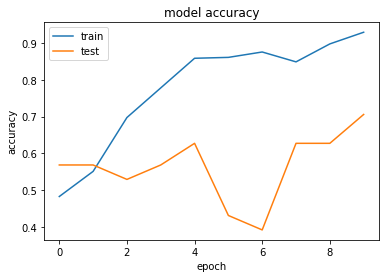

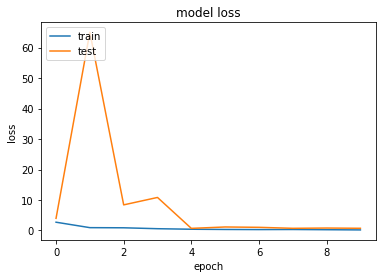

In [ ]:
draw_accuracy(history)
draw_loss(history)

## Not pretrained model

In [ ]:
model = keras.applications.resnet50.ResNet50(
    include_top=True,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling=None
)

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 19s 790ms/step - loss: 2.1577 - accuracy: 0.7122 - val_loss: 127.8670 - val_accuracy: 0.4118
Epoch 2/10
13/13 [==============================] - 9s 688ms/step - loss: 0.3600 - accuracy: 0.8780 - val_loss: 57.3796 - val_accuracy: 0.5686
Epoch 3/10
13/13 [==============================] - 9s 688ms/step - loss: 0.2523 - accuracy: 0.9244 - val_loss: 78.5712 - val_accuracy: 0.5686
Epoch 4/10
13/13 [==============================] - 9s 686ms/step - loss: 0.2049 - accuracy: 0.9220 - val_loss: 9.4451 - val_accuracy: 0.4314
Epoch 5/10
13/13 [==============================] - 9s 686ms/step - loss: 0.0798 - accuracy: 0.9707 - val_loss: 11.0515 - val_accuracy: 0.7647
Epoch 6/10
13/13 [==============================] - 9s 687ms/step - loss: 0.0433 - accuracy: 0.9829 - val_loss: 17.5454 - val_accuracy: 0.7451
Epoch 7/10
13/13 [==============================] - 9s 689ms/step - loss: 0.0356 - accuracy: 0.9854 - val_loss: 2.1148 - val_accuracy: 0.7843
Epoch 8/10

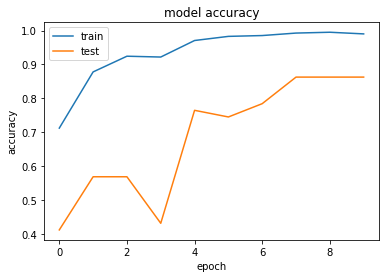

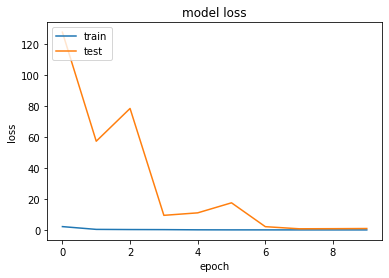

In [ ]:
draw_accuracy(history)
draw_loss(history)

## Classificator on features